In [1]:
import numpy as np
import pandas as pd

import sys
import os
import random

from PIL import Image, ImageFont, ImageDraw
from PIL.ImageChops import add, subtract, multiply, difference, screen

import cv2

import matplotlib.pyplot as plt

In [2]:
home = os.environ['HOME']
path = os.path.join(home, 'git', 'deep-food', 'gleb_google_images')
path

'/Users/iskriyanavasileva/git/deep-food/gleb_google_images'

In [3]:
background = cv2.imread('../test_images/background_table.jpg')
background = cv2.cvtColor(background, cv2.COLOR_BGR2RGB)

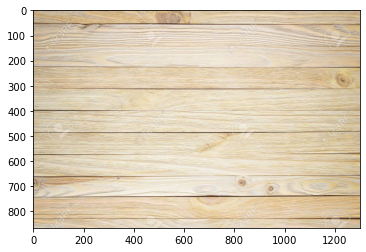

(866, 1300, 3)


In [4]:
plt.imshow(background)
plt.show()
print(background.shape)

In [5]:
ingredient = cv2.imread('../test_images/apple.jpeg')
ingredient = cv2.cvtColor(ingredient, cv2.COLOR_BGR2RGB)

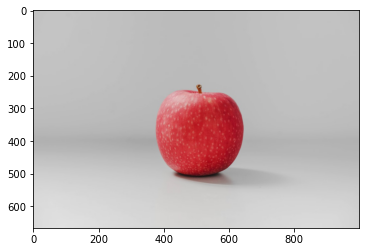

(667, 1000, 3)


In [6]:
plt.imshow(ingredient)
plt.show()
print(ingredient.shape)

In [7]:
rows_b, cols_b, channels_b = background.shape

In [8]:
rows_i = int(rows_b/2)
cols_i = int(cols_b/2)
dim_res = (cols_i, rows_i)
ingredient_res = cv2.resize(ingredient, dim_res)

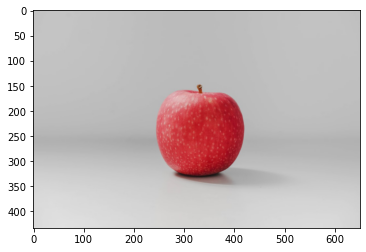

(433, 650, 3)


In [9]:
plt.imshow(ingredient_res)
plt.show()
print(ingredient_res.shape)

In [10]:
# Create a Region of Images (=ROI) in a randomised matter 
rows, cols, channels = ingredient_res.shape

# Randomising position of picture
start_rows = np.random.randint(0, rows_b-rows)
end_rows = start_rows + rows
start_cols = np.random.randint(0, cols_b-cols)
end_cols = start_cols + cols

roi = background[start_rows:end_rows, start_cols:end_cols] 
#roi = background[0:rows, 0:cols]

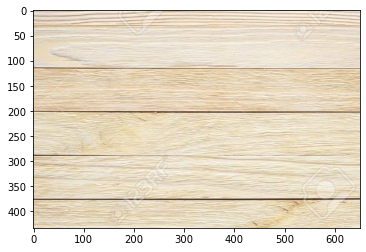

(433, 650, 3)


In [11]:
plt.imshow(roi)
plt.show()
print(roi.shape)

In [12]:
#rotation of image
deg = np.random.randint(0, 360)
M = cv2.getRotationMatrix2D((cols/2, rows/2), deg, 1)
print(deg, M)

297 [[   0.4539905    -0.89100652  370.35600007]
 [   0.89100652    0.4539905  -171.36606355]]


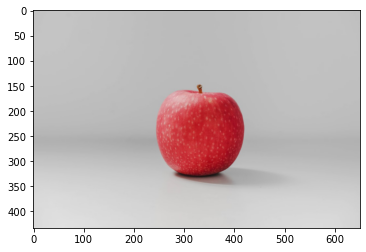

(433, 650, 3)


In [13]:
plt.imshow(ingredient_res)
plt.show()
print(ingredient_res.shape)

In [14]:
ingredient_rot = cv2.warpAffine(ingredient_res, M, (cols, rows))

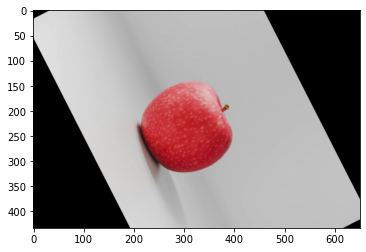

(433, 650, 3)


In [15]:
plt.imshow(ingredient_rot)
plt.show()
print(ingredient_rot.shape)

In [16]:
img2gray = cv2.cvtColor(ingredient_res, cv2.COLOR_BGR2GRAY)

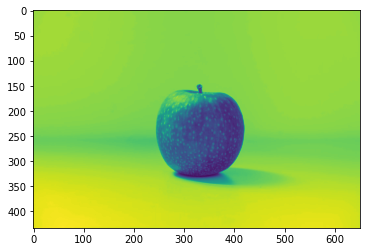

(433, 650)


In [17]:
plt.imshow(img2gray)
plt.show()
print(img2gray.shape)

In [18]:
blur = cv2.GaussianBlur(img2gray, (5,5), 0)

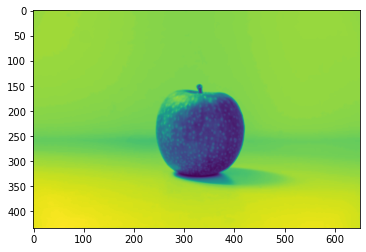

(433, 650)


In [19]:
plt.imshow(blur)
plt.show()
print(blur.shape)

In [20]:
ret, mask = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY_INV & cv2.THRESH_OTSU)

In [21]:
#plt.imshow(ret)
#plt.show()
#print(ret.shape)

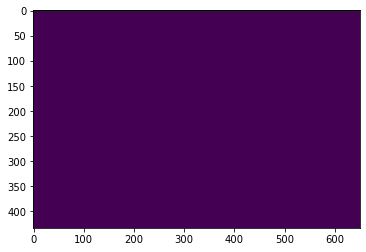

(433, 650)


In [22]:
plt.imshow(mask)
plt.show()
print(mask.shape)

In [23]:
mask_rot = cv2.warpAffine(mask, M, (cols, rows))

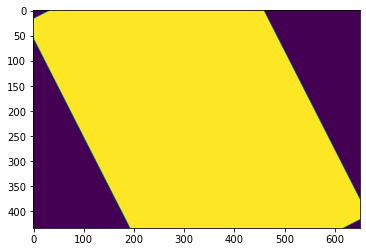

(433, 650)


In [24]:
plt.imshow(mask_rot)
plt.show()
print(mask_rot.shape)

In [25]:
#https://medium.com/@vishwasu2001/basic-arithmetic-and-bitwise-operations-on-images-with-open-cv-part-4-87d04e2a42c 
#mask_inv = cv2.bitwise_not(mask)
mask_inv = cv2.bitwise_not(mask_rot)

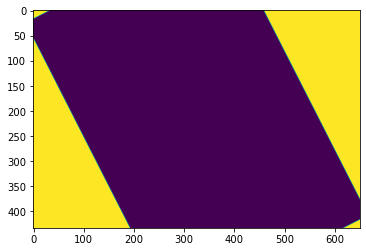

(433, 650)


In [26]:
plt.imshow(mask_inv)
plt.show()
print(mask_inv.shape)

In [27]:
# Black-out the area of the ingredient in ROI in the background image
background_bg = cv2.bitwise_and(roi, roi, mask = mask_inv)

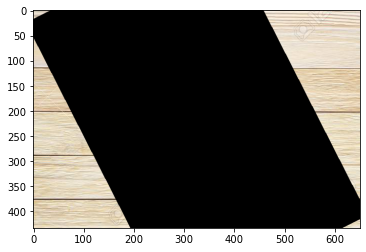

(433, 650, 3)


In [28]:
plt.imshow(background_bg)
plt.show()
print(background_bg.shape)

In [29]:
# Take only region of the ingredient from the ingredient image.
#ingredient_fg = cv2.bitwise_and(ingredient_res, ingredient_res, mask = mask)
ingredient_fg = cv2.bitwise_and(ingredient_rot, ingredient_rot, mask = mask_rot)

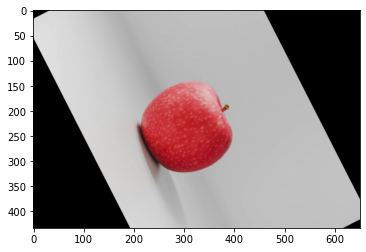

(433, 650, 3)


In [30]:
plt.imshow(ingredient_fg)
plt.show()
print(ingredient_fg.shape)

In [31]:
# Put the ingredient in ROI and modify the main image
dst = cv2.add(background_bg, ingredient_fg)

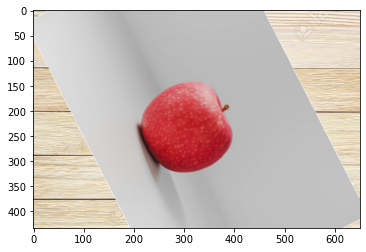

(433, 650, 3)


In [32]:
plt.imshow(dst)
plt.show()
print(dst.shape)

In [33]:
background[start_rows:start_rows+rows, start_cols:start_cols+cols] = dst
#background[0:rows, 0:cols] = dst

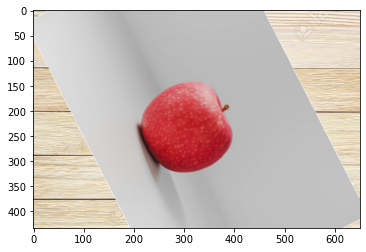

(433, 650, 3)


In [34]:
plt.imshow(background[start_rows:start_rows+rows, start_cols:start_cols+cols])
#plt.imshow(background[0:rows, 0:cols])
plt.show()
print(background[start_rows:start_rows+rows, start_cols:start_cols+cols].shape)

In [35]:
img_comb = background 

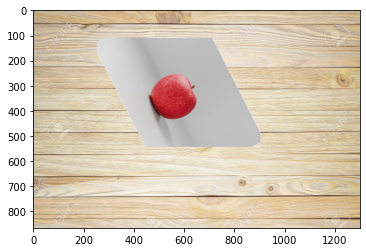

(866, 1300, 3)


In [36]:
plt.imshow(img_comb)
plt.show()
print(img_comb.shape)

# PIL transparent images

In [55]:
background_transp = Image.open('../test_images/background_table.jpg')

In [56]:
ingredient_transp = Image.open('../test_images/apple_transp.jpeg')
#ingredient_new = Image.new("RGBA", background_transp.size)
#ingredient_new.paste(ingredient_transp, (0,0), ingredient_transp.convert('RGBA'))
#new_img = Image.alpha_composite(background_transp, ingredient_new)
#ingredient_transp = Image.open('../test_images/apple.jpeg')
#ingredient_transp_new = Image.new("RGBA", background_transp.size)
#ingredient_transp = ingredient_transp.convert('RGBA')

In [54]:
ingredient_new.show()

In [57]:
background_transp.paste(ingredient_transp, (0, 0), ingredient_transp)
#background_transp.paste(ingredient_transp.convert('RGBA'), (0, 0), ingredient_transp.convert('RGBA'))

ValueError: bad transparency mask

In [ ]:
#background_transp.save("../test_images/background_transp.jpg")
#background_transp.show()
#Image.alpha_composite(background_transp.convert('RGBA'), ingredient_transp.resize(background_transp.size).convert('RGBA')).save('../test_images/background_transp2.png')

In [ ]:
background_transp2 = Image.open('../test_images/background_transp2.png')

In [ ]:
ingredient_new.show()

In [ ]:
#mask_im = ingredient_transp.resize(ingredient_transp.size).convert('L')

#back_im = background_transp.copy()
#back_im.paste(ingredient_transp, (100, 50), mask_im)
#back_im.save('../test_images/apple_background.jpeg')

# Assembled images simple pasting

In [ ]:
def load_bg_random(path, bg_folder='background'):
    """
    chooses a random background image
    """    
    bg_folder = os.path.join(path, bg_folder)
    bg_files = os.listdir(bg_folder)
    bg_files = [f for f in bg_files if not f[0] == '.']
    bg_index = random.randrange(0, len(bg_files))
    
    bg = os.path.join(path, bg_folder, bg_files[bg_index])
    
    background = cv2.imread(bg)
    rows_b, cols_b, channels_b = background.shape
    
    return background, rows_b, cols_b, channels_b 

In [ ]:
# parameters 
home = os.environ['HOME']
path = os.path.join(home, 'git', 'deep-food', 'deep-food')
ingr_dict = {'orange': 3, 
             'banana': 2, 
             'watermelon': 1,
             'chocolate': 5
            }
ingr_size = (100, 100)
grid_step = 200


#n_ingr = sum(ingr_dict.values())
#ingr_rows = int(bg_size[0] / n_ingr)
#ingr_cols = int(bg_size[1] / n_ingr)
#ovrlp_rows = 1
#ovrlp_cols = 1
#grid_rows = n_ingr
#grid_cols = n_ingr
#grid = grid_rows * grid_cols

In [ ]:
#ToDos: 
#1. define size background - done
#2. check why complete overlapping - done
#3. all images smaller than background? - idea divide by the number of ingredients - done
#4. see what exactly to define by slots - done
#5. slots - why disappearing
#6. try 2 other ways for masking
#7. put everything in a function - done

# list with ingredient images
ingredients = []
dirs = list(ingr_dict.keys())
n_ingr = sum(ingr_dict.values())
    
for dir in dirs:
    ingr_folder = os.path.join(path, dir) 
    ingr_files = os.listdir(ingr_folder)
    ingr_files = [f for f in ingr_files if not f[0] == '.']

    sample_size = ingr_dict[dir]
    #random choice of image with repetition - https://pynative.com/python-random-sample/
    ingredient_index = random.choices(ingr_files, k=sample_size)
    #rows, cols = [int(dim / grid_cols) for dim in bg.size]
    rows, cols = ingr_size

    for ing in ingredient_index:
        ingredient_path = os.path.join(path, ingr_folder, ing)
        ingredient = Image.open(ingredient_path)        
        ##make sure ingredient is smaller than background
        #if ingredient.size[0] <= 512 or ingredient.size[1] <= 1024:
        #    rows, cols = ingredient.size
        #else:
        #    rows_if_img_big = int(rows_b/2/ sample_size)
        #    cols_if_img_big = int(cols_b/2/ sample_size )
        #    rows, cols = rows_if_img_big, cols_if_img_big
        
        ingredient = ingredient.resize((rows, cols))
        ingredients.append(ingredient)
    
# background generation
background = load_bg_random(path)[0]
background = cv2.cvtColor(background, cv2.COLOR_BGR2RGB)
background = Image.fromarray(background)
bg = background.resize((512, 1024)).copy()
bg_size = bg.size
rows_b, cols_b = bg.size
print(f'rows_b, cols_b: {rows_b}, {cols_b}')
    
# grid definition
grid_width = bg_size[0]
grid_height = bg_size[1]
grid_step = grid_step
x = np.arange(0, grid_width, grid_step)
y = np.arange(0, grid_height, grid_step)
X,Y = np.meshgrid(x,y)
coords = np.array(list(zip(X.flatten(), Y.flatten())))
coords = coords[np.random.choice(np.arange(len(coords)), size = n_ingr), :]
    
# image pasting
for i, ingredient in enumerate(ingredients):
    rows_adj = tuple(coords[i])[0]
    cols_adj = tuple(coords[i])[1]
    bg.paste(ingredient, (rows_adj, cols_adj))  


In [ ]:
# Grid trials

#ingr_width, ingr_height = ingredient.size
#bg_width, bg_height = bg.size
#bg_work = bg.copy()
#for left in range(0, grid_rows):
#    for top in range(0, grid_cols):
#        #print(left, top)
#        bg_work.paste(ingredient, (ingr_width, ingr_height))
#        ingr_width += sliding_window
#        ingr_height += sliding_window 
#ingredient.show() 
        

#for i in range(grid):
#    bg.paste(ingredient, (rows, cols))
#    rows += sliding_window
        
#rows = 0        
#for i, ingredient in enumerate(ingredients):
#    bg.paste(ingredient, (rows, cols))
#    rows += sliding_window
#    cols += sliding_window


##ingr_width, ingr_height = (0, 93)
#bg_work = bg.copy()
#for i, ingredient in enumerate(ingredients):
#    #ingredient = ingredient.resize((ingr_rows, ingr_cols))
#    #rows_options = np.array([tuple(coords[i])[0] - ingredient.size[0], tuple(coords[i])[0]])
#    rows_adj = tuple(coords[i])[0] #np.max(rows_options)
#    #cols_options = np.array([tuple(coords[i])[1] - ingredient.size[1], tuple(coords[i])[1]])
#    cols_adj = tuple(coords[i])[1]#np.max(cols_options)
#    bg_work.paste(ingredient, (rows_adj, cols_adj))
#    #ingr_width += int(ingr_rows * 1)
#    #ingr_height += int(ingr_cols * 1)
#    #print(ingr_width, ingr_height)
#bg_work.show()

In [ ]:
# check if there are images bigger than (512,1024)
path = os.path.join(home, 'git', 'deep-food', 'deep-food')
for root, dirs, files in os.walk(path):
    files = [f for f in files if not f[0] == '.' and f.find('background') == -1]
    for f in files:
        file_path = os.path.join(root, f)
        ingredient = Image.open(file_path)
        if ingredient.size[0] >= 512 or ingredient.size[1] >= 1024:
            print(file_path, ingredient.size)

In [ ]:
grid_width

In [ ]:
grid_height

In [ ]:
grid_step

In [ ]:
x1 = np.arange(0, grid_width, grid_step)
x1

In [ ]:
y1 = np.arange(0, grid_height, grid_step)
y1

In [ ]:
X1,Y1 = np.meshgrid(x,y)
print(X1)
print(Y1)

In [ ]:
max(y1)

In [ ]:
X1.flatten()

In [ ]:
Y1.flatten()

In [ ]:
np.array(list(zip(X.flatten(), Y.flatten())))

In [ ]:
coords[0]#[1]

In [ ]:
ingredients[0].show()

In [ ]:
bg.show()

In [ ]:
grid_width = bg_size[0]
grid_height = bg_size[1]
grid_step = grid_step
x = np.arange(0, grid_width, grid_step)
y = np.arange(0, grid_height, grid_step)
X,Y = np.meshgrid(x,y)
coords = np.array(list(zip(X.flatten(), Y.flatten())))
coords = coords[np.random.choice(np.arange(len(coords)), size = n_ingr), :]
#plt.scatter(coords[:,0], coords[:, 1])
coords

In [ ]:
tuple(coords[5])

In [ ]:
ingredients

In [ ]:
coords[5]

In [ ]:
ingredients[3].size

In [ ]:
ingredients[1].show()

In [ ]:
bg_work2 = background.copy().resize(bg_size)
img = ingredients[3]
bg_work2.paste(img,(0,1000))
bg_work2.show()

In [ ]:
np.minimum(tuple(coords[i])[1],img.size[1])